In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sst
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# a)

In [2]:
df = pd.read_csv('police.csv')
df.columns = df.columns.str.replace('.','_',regex=True)
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [3]:
Var_1=len(df)

var_2=len(df.columns)

In [4]:
Var_1

91741

In [5]:
var_2

15

# b)

In [8]:
var_3=df.isnull().sum()
var_3

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

# c)

In [9]:
df2=df.drop(columns=['county_name','state'])
df2.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


# d)

In [11]:
df3=df2.dropna(subset=['driver_gender'])
df3.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


# e)

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


In [13]:
df3['district']=df3['district'].astype('category')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   stop_date           86536 non-null  object  
 1   stop_time           86536 non-null  object  
 2   driver_gender       86536 non-null  object  
 3   driver_race         86536 non-null  object  
 4   violation_raw       86536 non-null  object  
 5   violation           86536 non-null  object  
 6   search_conducted    86536 non-null  bool    
 7   search_type         3307 non-null   object  
 8   stop_outcome        86536 non-null  object  
 9   is_arrested         86536 non-null  object  
 10  stop_duration       86536 non-null  object  
 11  drugs_related_stop  86536 non-null  bool    
 12  district            86536 non-null  category
dtypes: bool(2), category(1), object(10)
memory usage: 7.5+ MB


# f)

In [14]:
df4=df3


df4['stop_datetime']=df4['stop_date']+' '+df4['stop_time']

df4=df4.drop(columns=['stop_date','stop_time'])

df4['stop_datetime'] = pd.to_datetime(df4['stop_datetime'])

pd.set_option("display.max_columns",8)
df4.head()

,driver_gender,driver_race,violation_raw,violation,...,stop_duration,drugs_related_stop,district,stop_datetime
0,M,White,Equipment/Inspection Violation,Equipment,...,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,M,White,Speeding,Speeding,...,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,M,White,Speeding,Speeding,...,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,M,White,Call for Service,Other,...,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,F,White,Speeding,Speeding,...,0-15 Min,False,Zone X3,2005-02-24 01:20:00


# g)

In [15]:
df4.set_index(['stop_datetime'], inplace=True)

df4.head()

,driver_gender,driver_race,violation_raw,violation,...,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,...,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,...,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,...,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,...,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,...,False,0-15 Min,False,Zone X3


# 2)

a)

In [16]:
viol_1 = df4['violation'].value_counts()

violação = pd.DataFrame(viol_1)

violação = violação.rename(columns = {'violation':'Fi'})
violação.index.names=['violation']


maior = violação['Fi'].idxmax()
menor = violação['Fi'].idxmin()

violação

,Fi
violation,
Speeding,48423
Moving violation,16224
Equipment,10921
Other,4409
Registration/plates,3703
Seat belt,2856


In [17]:
maior

'Speeding'

In [18]:
menor

'Seat belt'

b)

In [19]:
tab1 = pd.crosstab(df4['driver_gender'],df4['violation'],
                 rownames = ['Sexo'],
                 colnames = ['Infrações'],
                 margins_name = 'Total',
                 margins=True,)
tab1

Infrações,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,Total
Sexo,,,,,,,
F,2501,3286,707,1056,578,15646,23774
M,8420,12938,3702,2647,2278,32777,62762
Total,10921,16224,4409,3703,2856,48423,86536


In [20]:
tab2 = (pd.crosstab(df4['driver_gender'],df4['violation'],
                 rownames = ['Sexo'],
                 colnames = ['Infrações'],
                 margins_name = 'Total',
                 margins = True,
                 normalize = True)*100).round(3)
tab2

Infrações,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,Total
Sexo,,,,,,,
F,2.89,3.797,0.817,1.220,0.668,18.080,27.473
M,9.73,14.951,4.278,3.059,2.632,37.877,72.527
Total,12.62,18.748,5.095,4.279,3.300,55.957,100.000


c)

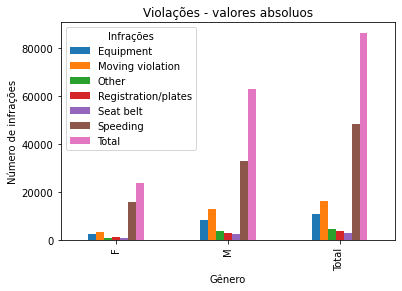

In [21]:
tab1.plot.bar()
plt.title('Violações - valores absoluos')
#Para acresentar título eixo X, pelo método 'plt', usamos 'plt.xlabel()'.
plt.xlabel("Gênero")
#Para acresentar título eixo Y, pelo método 'plt', usamos 'plt.ylabel()'.
plt.ylabel("Número de infrações");

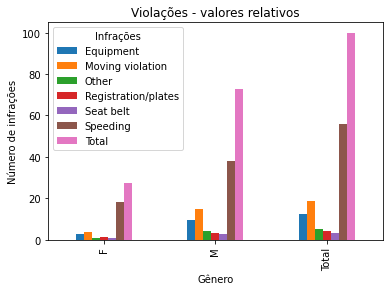

In [22]:
tab2.plot.bar()
plt.title('Violações - valores relativos')
#Para acresentar título eixo X, pelo método 'plt', usamos 'plt.xlabel()'.
plt.xlabel("Gênero")
#Para acresentar título eixo Y, pelo método 'plt', usamos 'plt.ylabel()'.
plt.ylabel("Número de infrações");

d)

In [23]:
tab3=pd.crosstab(df4['driver_gender'],df4['stop_outcome'],
                 rownames = ['Sexo'],
                 colnames = ['Infrações'],
                 margins_name = 'Total',
                 margins = True,)
tab3

Infrações,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning,Total
Sexo,,,,,,,
F,556,113,21251,168,201,1485,23774
M,2179,230,55840,439,423,3651,62762
Total,2735,343,77091,607,624,5136,86536


e)

In [24]:
revistados_e_não_revistados = pd.DataFrame(df4['search_conducted'].value_counts(normalize=True)*100).round(2)

revistados_sim = revistados_e_não_revistados['search_conducted'].iloc[1]

revistados_sim

3.82

f)

In [25]:
ocorrencias = df4.loc[df4['search_conducted'] == 1]

Revista = (ocorrencias['driver_gender'].value_counts(normalize = True)*100).round(2)

Revista_1 = pd.DataFrame(Revista)

Revista_1 = Revista_1.rename(columns = {'driver_gender':'Fi'})
Revista_1.index.names = ['Gênero']

Revista_1

,Fi
Gênero,
M,86.21
F,13.79


g)

In [26]:
ocorrencias_revistas = df4.loc[df4['search_conducted'] == 1]

ocorren_revistas_colunas=ocorrencias_revistas.loc[:,['search_conducted',"driver_gender","violation"]]

Result2=ocorren_revistas_colunas.groupby(by=['driver_gender','violation']).sum().apply(lambda x:x*100/float(x.sum())).round(3)

Result2

search_conducted
driver_gender violation                            
F             Equipment                       3.024
              Moving violation                3.901
              Other                           0.877
              Registration/plates             1.754
              Seat belt                       0.302
              Speeding                        3.931
M             Equipment                      18.204
              Moving violation               24.070
              Other                           5.171
              Registration/plates             8.709
              Seat belt                       2.419
              Speeding                       27.638

# 3)

a)

In [27]:
Média = ((df4['is_arrested'].mean())*100).round(2)

Média

3.56

b)

In [37]:

df5 = df4

df5 = df5.reset_index()


Novo_df = df5.loc[:,["stop_datetime","is_arrested"]]


Novo_df2 = pd.DataFrame(Novo_df.value_counts())
Novo_df2 = Novo_df2.reset_index()


Result = Novo_df2.groupby(by = Novo_df2['stop_datetime'].dt.hour)['is_arrested'].mean().round(3)


Result_Prisao = pd.DataFrame(Result)
Result_Prisao = Result_Prisao.reset_index()

Result_Prisao = Result_Prisao.set_index(['stop_datetime'])
Result_Prisao.head()

,is_arrested
stop_datetime,
0,0.052
1,0.065
2,0.061
3,0.060
4,0.048


c)

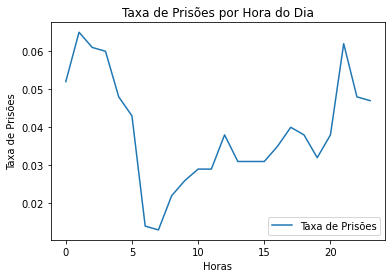

In [35]:
hourly_arrest_rate=Result_Prisao

hourly_arrest_rate.plot( title = 'Taxa de Prisões por Hora do Dia', 
                        xlabel = "Horas", 
                        ylabel = "Taxa de Prisões");

d)

In [33]:
Taxa_anual_drogas = df5[['stop_datetime','drugs_related_stop']]
Taxa_anual_drogas = Taxa_anual_drogas.reset_index()

Result3 = (Taxa_anual_drogas.groupby(by=Taxa_anual_drogas['stop_datetime'].dt.year)['drugs_related_stop'].mean())
                    
Annual_drug_rate = pd.DataFrame(Result3)
Annual_drug_rate = Annual_drug_rate.reset_index()

Annual_drug_rate = Annual_drug_rate.set_index(['stop_datetime'])
Annual_drug_rate

,drugs_related_stop
stop_datetime,
2005,0.006501
2006,0.007258
2007,0.007970
2008,0.007505
2009,0.009889
2010,0.010081
2011,0.009731
2012,0.009921
2013,0.013094


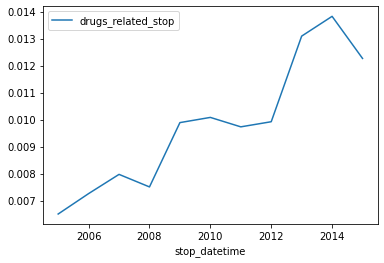

In [34]:
hourly_arrest_rate = Annual_drug_rate

hourly_arrest_rate.plot();

e)

In [38]:
Taxa_anual_ = df5[['stop_datetime','search_conducted']]
Taxa_anual_ = Taxa_anual_.reset_index()

Result4 = (Taxa_anual_.groupby(by=Taxa_anual_['stop_datetime'].dt.year)['search_conducted'].mean()).round(3)
                    
Annual_search_rate = pd.DataFrame(Result4)

combin_dados = pd.concat([Annual_search_rate,Annual_drug_rate],axis=1)

combin_dados

,search_conducted,drugs_related_stop
stop_datetime,,
2005,0.049,0.006501
2006,0.042,0.007258
2007,0.044,0.007970
2008,0.040,0.007505
2009,0.050,0.009889
2010,0.045,0.010081
2011,0.036,0.009731
2012,0.034,0.009921
2013,0.030,0.013094


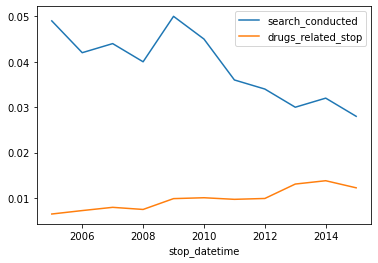

In [39]:
Annual_search_rate_graf = combin_dados

Annual_search_rate_graf.plot();

f)

In [41]:
tab5 = pd.crosstab(df4['district'],df4['violation'],
                 rownames = ['Distrito'],
                 colnames = ['Infrações'],
                 margins = True)
tab5

Infrações,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding,All
Distrito,,,,,,,
Zone K1,672,1254,290,120,0,5960,8296
Zone K2,2061,2962,942,768,481,10448,17662
Zone K3,2302,2898,705,695,638,12322,19560
Zone X1,296,671,143,38,74,1119,2341
Zone X3,2049,3086,769,671,820,8779,16174
Zone X4,3541,5353,1560,1411,843,9795,22503
All,10921,16224,4409,3703,2856,48423,86536


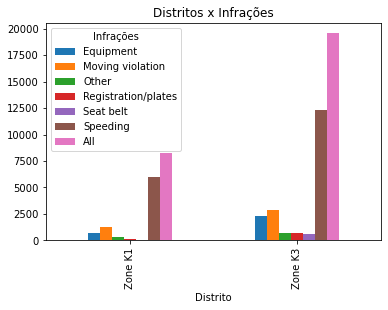

In [43]:
tab_5 = tab5

tab_6 = tab_5.loc[['Zone K1','Zone K3'],:]
tab_6

tab_6.plot.bar()
plt.title('Distritos x Infrações');

In [1]:
print(f'O distrito policial "Zone K3" apresenta mais '
      'dados quando comparados '
      'ao distrito policial "Zone K1".')

O distrito policial "Zone K3" apresenta mais dados quando comparados ao distrito policial "Zone K1".


# 4)

In [45]:
df_tempo = pd.read_csv('weather.csv')
df_tempo.columns = df_tempo.columns.str.replace('.','_',regex=True)
df_tempo.head()

,STATION,DATE,TAVG,TMIN,...,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,...,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,...,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,...,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,...,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,...,1.0,NaN,NaN,NaN


a)

In [46]:
colunas_selec = df_tempo[['TMIN', 'TAVG', 'TMAX']].describe()
colunas_selec

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


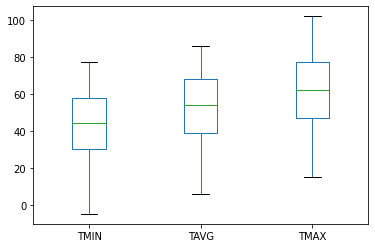

In [47]:
df_tempo[['TMIN', 'TAVG', 'TMAX']].plot.box();